In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
#Reading all the data
X_train = pd.read_csv(r"C:\Users\RAVI\Desktop\MyWork\dataset\X_train.csv", sep= ' ', header=None)
X_test = pd.read_csv(r"C:\Users\RAVI\Desktop\MyWork\dataset\X_test.csv", sep= ' ', header=None)
y_train = pd.read_csv(r"C:\Users\RAVI\Desktop\MyWork\dataset\y_train.csv", header=None)
y_test = pd.read_csv(r"C:\Users\RAVI\Desktop\MyWork\dataset\y_test.csv", header=None)

In [39]:
X = pd.concat([X_train, X_test], axis = 0)
y = pd.concat([y_train, y_test], axis = 0)

In [40]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080


In [41]:
y.head()

,0
0,5
1,5
2,5
3,5
4,5


In [6]:
y2 = y

In [7]:
y2 = np.asarray(y2)

In [8]:
y2 = pd.DataFrame(y2)

In [9]:
y2[0][367]

2

### GRAPHICAL REPRESENTATION

In [10]:
#for graphs the categorical data
for i in range(0, len(y2)):
    if(y2[0][i] == 1):
        y2[0][i] = 'Walking'
    elif(y2[0][i] == 2):
        y2[0][i] = 'Walking Upstairs'
    elif(y2[0][i] == 3):
        y2[0][i] = 'Walking Downstairs'
    elif(y2[0][i] == 4):
        y2[0][i] = 'Sitting'
    elif(y2[0][i] == 5):
        y2[0][i] = 'Standing'
    elif(y2[0][i] == 6):
        y2[0][i] = 'Laying'
    elif(y2[0][i] == 7):
        y2[0][i] = 'Stand To Sit'
    elif(y2[0][i] == 8):
        y2[0][i] = 'Sit To Stand'
    elif(y2[0][i] == 9):
        y2[0][i] = 'Sit To Lie'
    elif(y2[0][i] == 10):
        y2[0][i] = 'Lie To Sit'
    elif(y2[0][i] == 11):
        y2[0][i] = 'Stand To Lie'
    elif(y2[0][i] == 12):
        y2[0][i] = 'Lie To Stand'

In [11]:
X.shape

(10929, 561)

In [12]:
#PCA algorithm being used for the dimensionality reduction process in the given case
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [13]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
X_trans = pca.transform(X)

In [15]:
X_trans = pd.DataFrame(X_trans, columns = ['F1', 'F2'])

In [16]:
X_trans.head()

,F1,F2
0,-5.407597,-0.013310
1,-5.446587,-0.397406
2,-5.396125,-0.896960
3,-5.584420,-1.306291
4,-5.643893,-1.578576


In [17]:
X_trans['label'] = y2[0]

In [18]:
X_trans.tail()

,F1,F2,label
10924,4.038259,0.908505,Walking Upstairs
10925,4.563269,0.464078,Walking Upstairs
10926,4.166619,0.631964,Walking Upstairs
10927,3.429063,0.705315,Walking Upstairs
10928,3.620265,0.473370,Walking Upstairs


E:\Anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


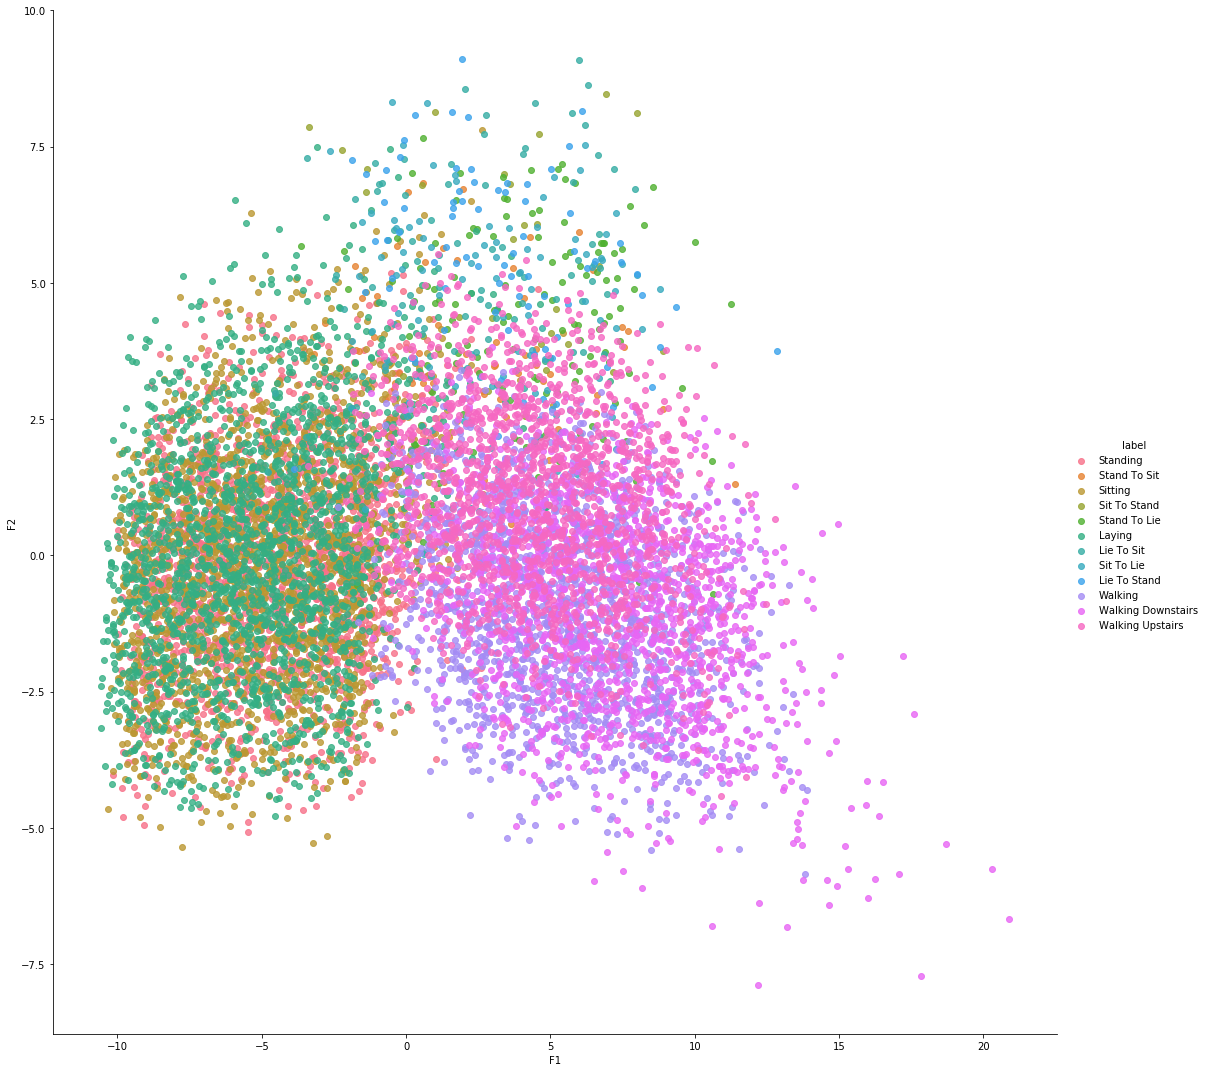

In [19]:
sns.lmplot(x = 'F1', y = 'F2', data = X_trans, hue = 'label',  fit_reg = False, x_jitter = 4.25, y_jitter = 2.4, size = 15)

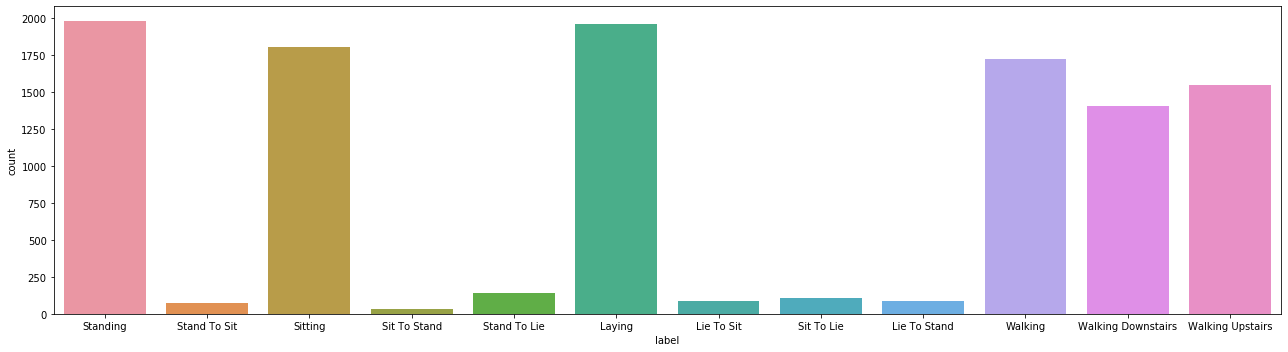

In [20]:
plt.figure(figsize = (18, 5))
sns.countplot(x = 'label', data = X_trans)
plt.tight_layout()

E:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x720 with 0 Axes>

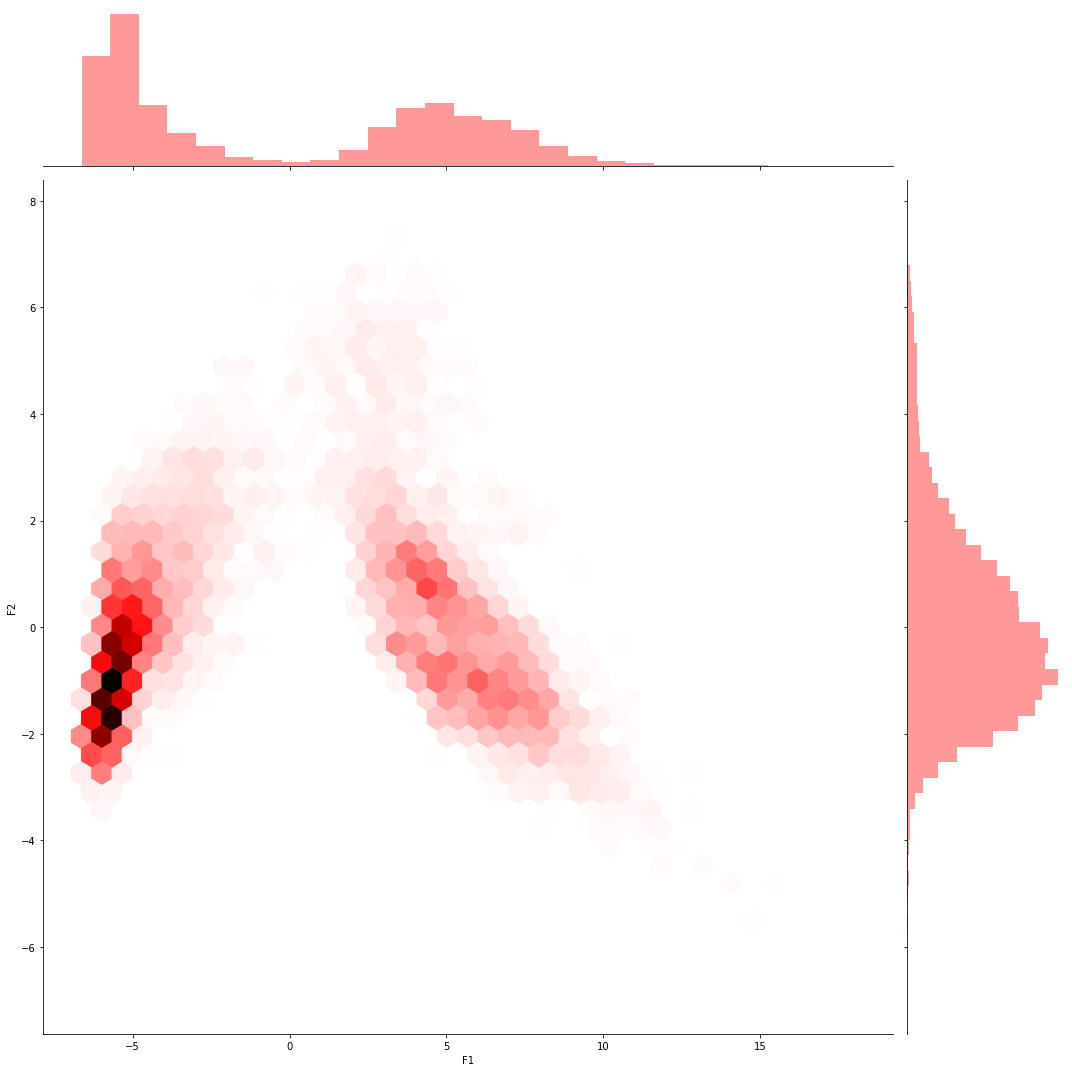

In [21]:
#jointplot for the data
plt.figure(figsize = (15, 10))
sns.jointplot(x= 'F1', y = 'F2', data = X_trans, kind = 'hex', color = 'red', size = 15 )
plt.tight_layout()

E:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

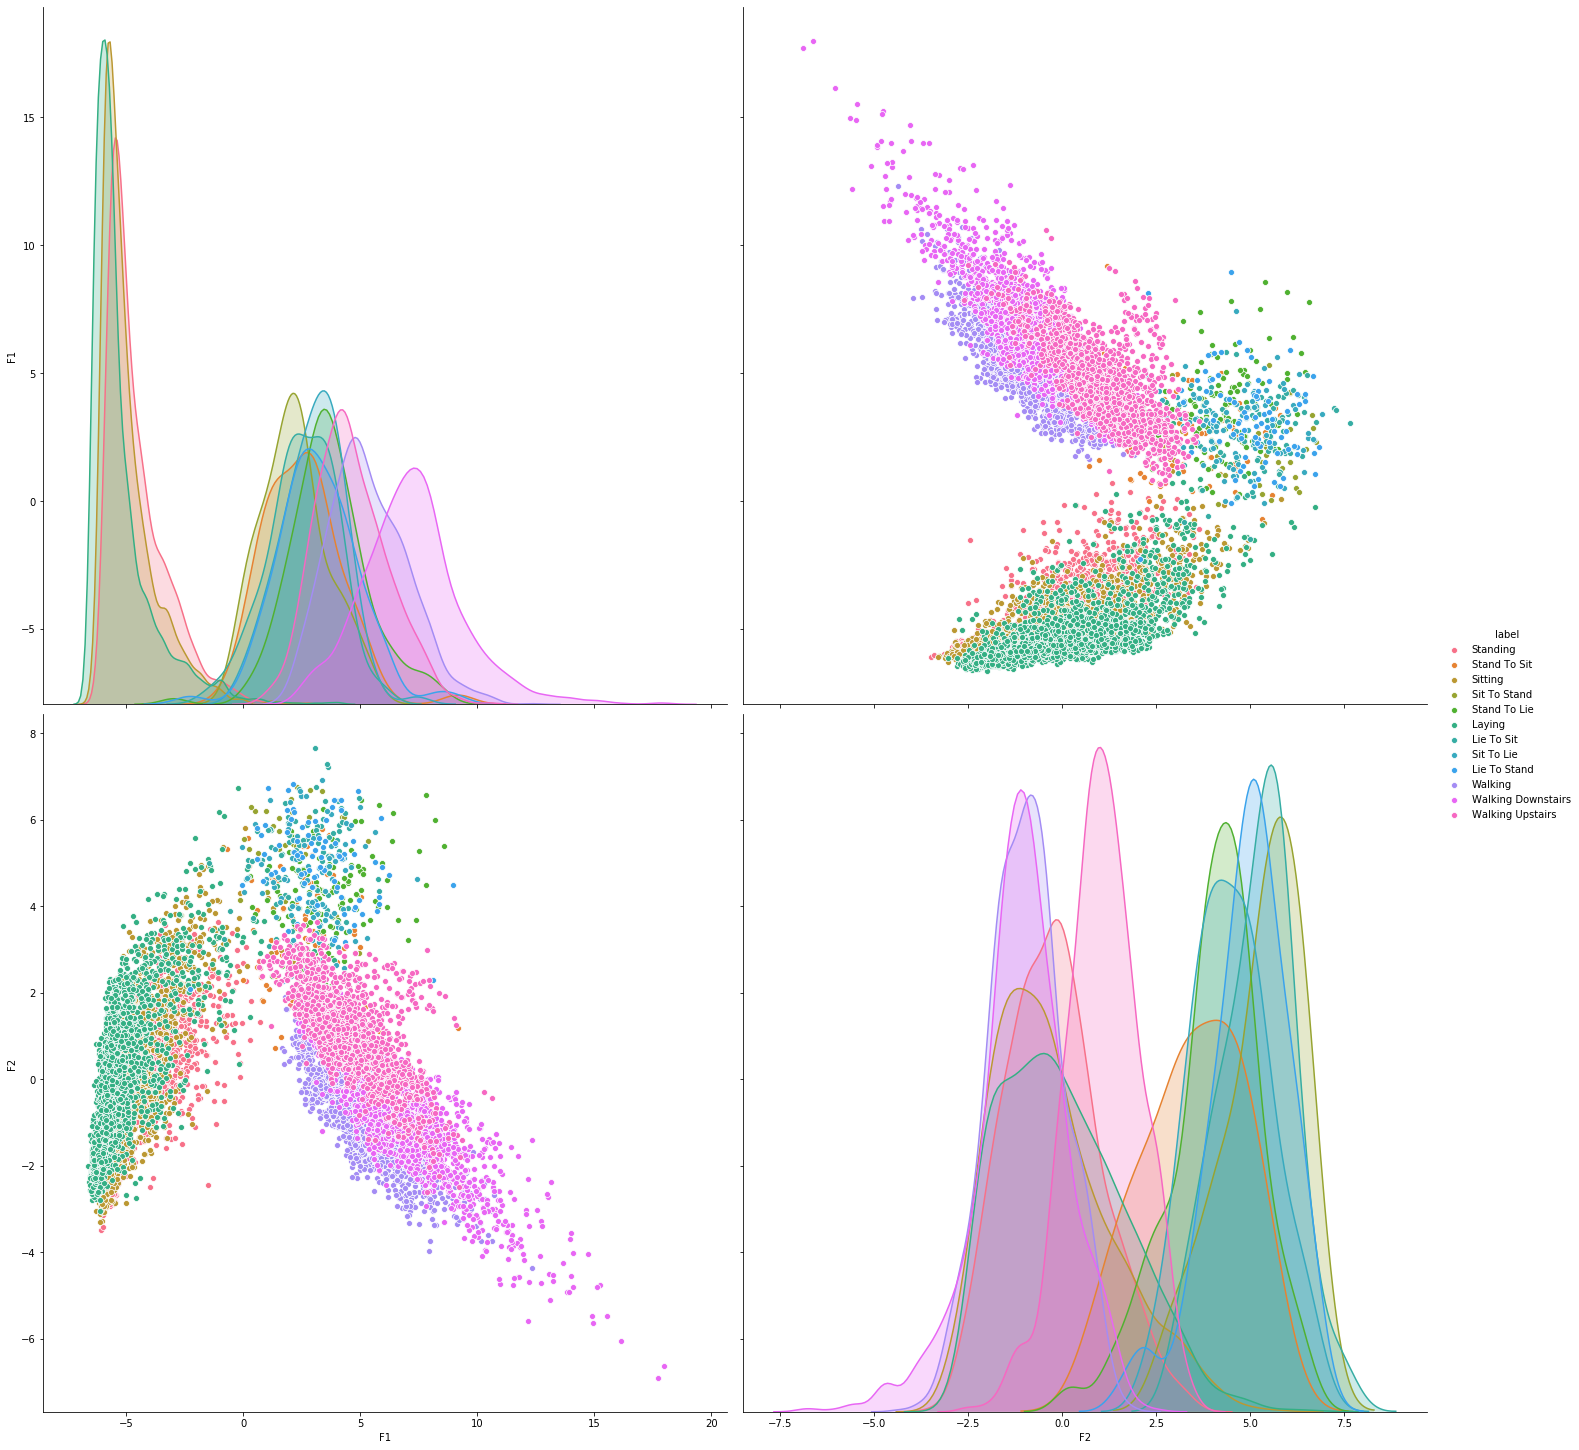

In [22]:
plt.figure(figsize = (10, 10))
sns.pairplot(X_trans, hue = 'label', size = 10)

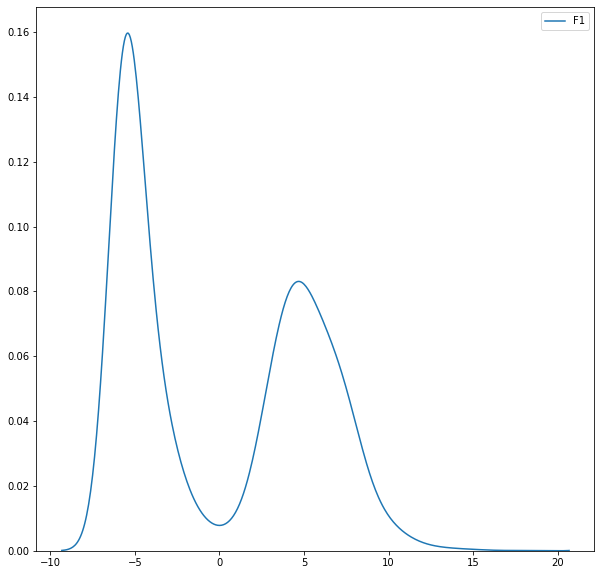

In [23]:
#KDE plot
plt.figure(figsize = (10,10))
sns.kdeplot(X_trans['F1'], gridsize = 500)

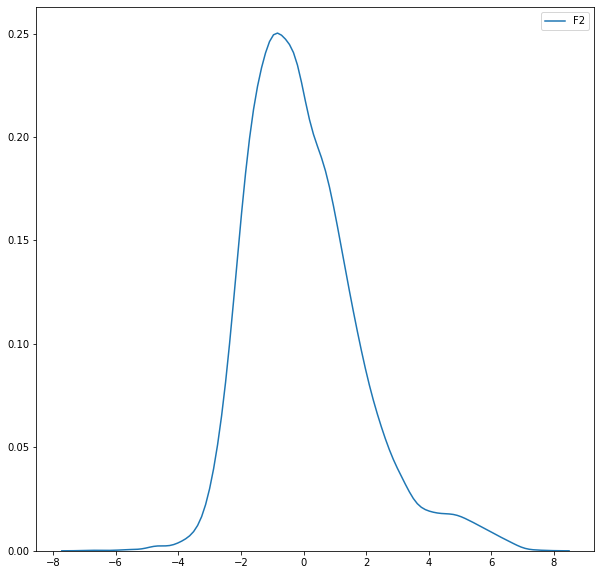

In [24]:
plt.figure(figsize = (10, 10))
sns.kdeplot(X_trans['F2'])

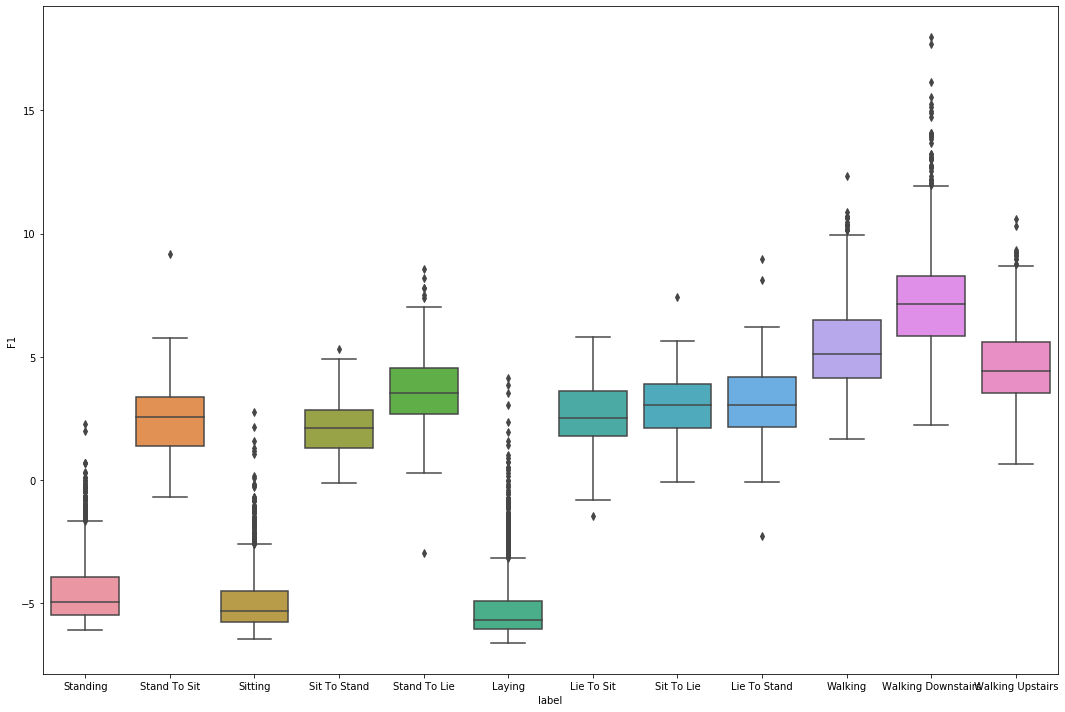

In [25]:
#Boxplot
#Here x needs to be categorical and y needs to be continuous
#Points outside the whiskers are the outliers
plt.figure(figsize = (15, 10))
sns.boxplot(x = 'label', y ='F1', data = X_trans)
plt.tight_layout()

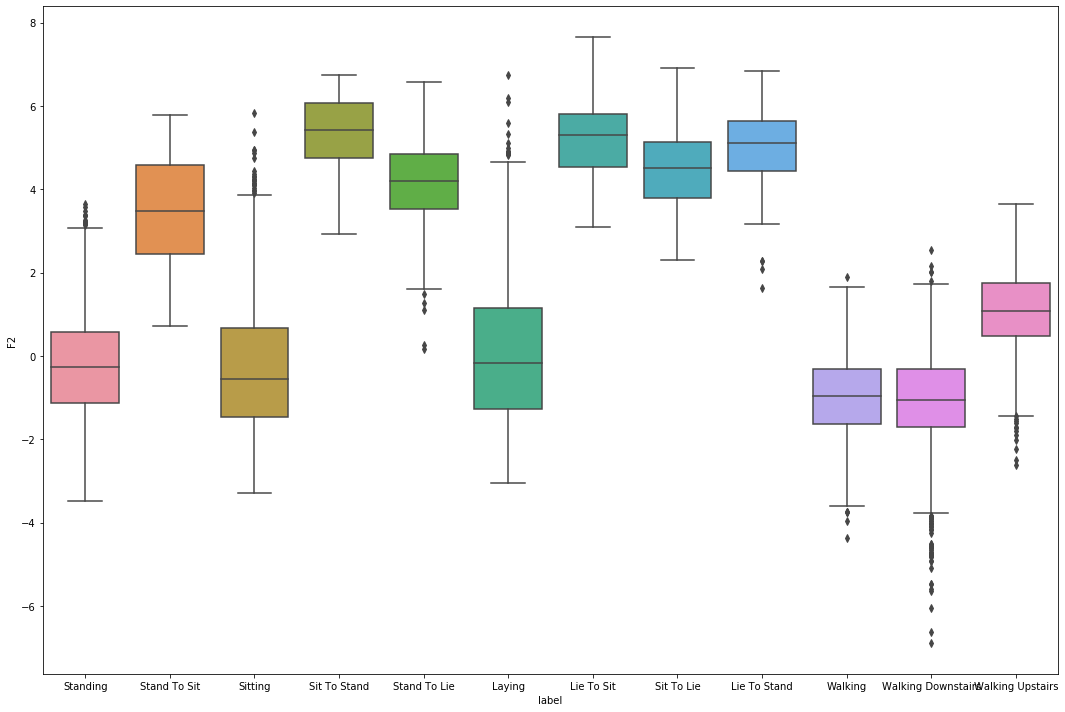

In [26]:
plt.figure(figsize = (15, 10))
sns.boxplot(x = 'label', y ='F2', data = X_trans)
plt.tight_layout()

E:\Anaconda3\lib\site-packages\seaborn\categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


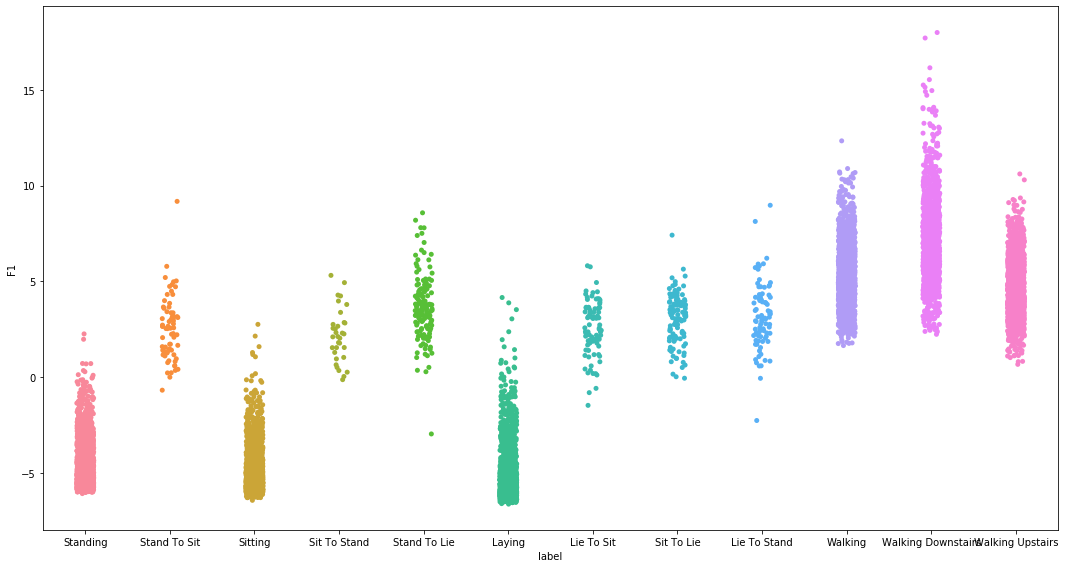

In [27]:
#Jitter argument actually introduces a bit of noise so that points become separate from each other
plt.figure(figsize = (15, 8))
sns.stripplot(x = 'label', y= 'F1', data = X_trans, jitter = True, split = True)
plt.tight_layout()

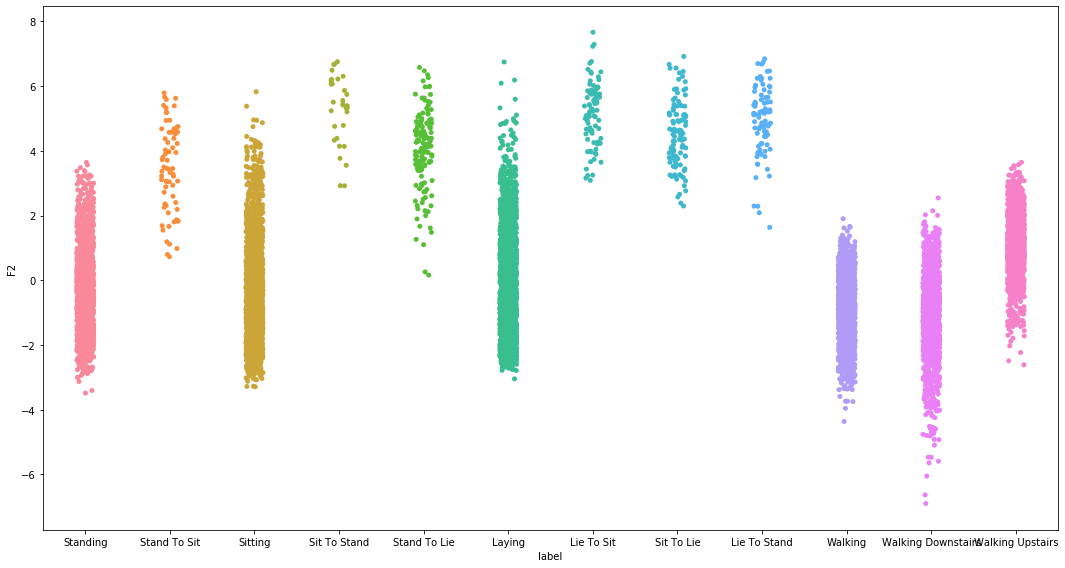

In [28]:
plt.figure(figsize = (15, 8))
sns.stripplot(x = 'label', y= 'F2', data = X_trans, jitter = True, split = True)
plt.tight_layout()

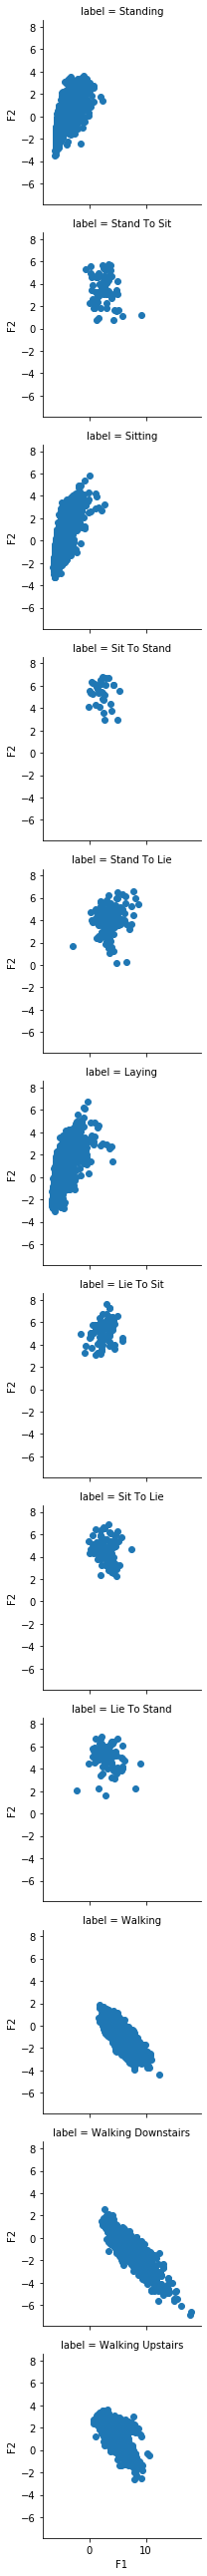

In [29]:
#Drawing another FacetGrid plot
#plt.figure(figsize = (15, 10))
g = sns.FacetGrid(data = X_trans, row = 'label')
g.map(plt.scatter, 'F1', 'F2')

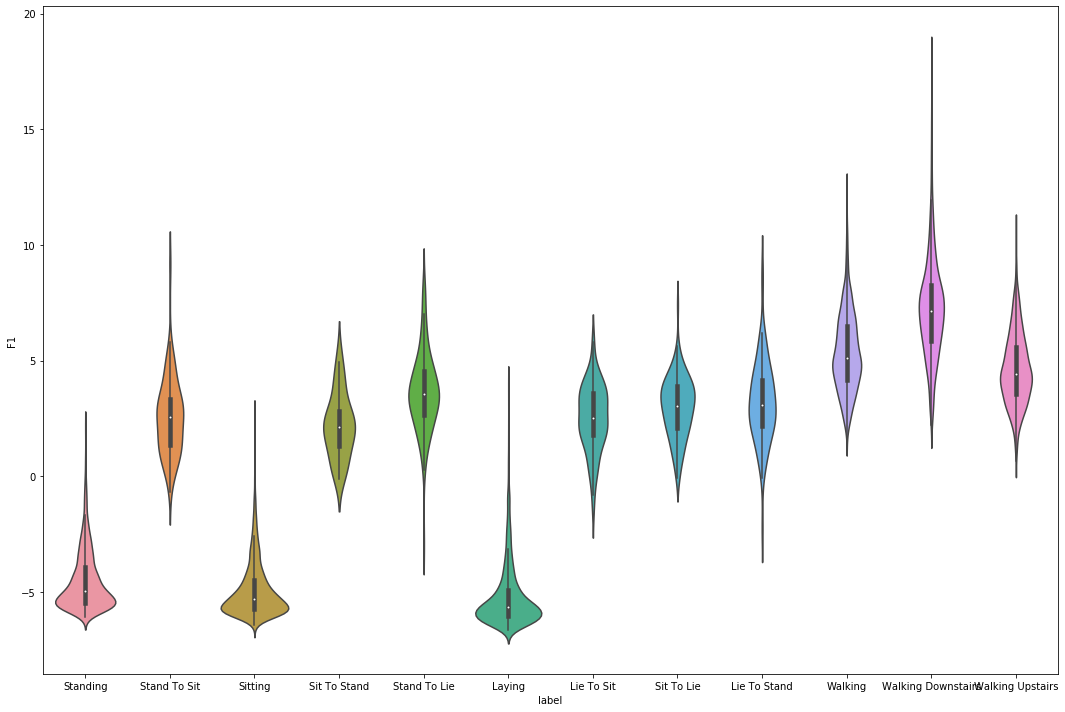

In [30]:
#Violin Plot, which is very similar to Boxplot
#Parameters are similar to boxplot
plt.figure(figsize = (15, 10))
sns.violinplot(x = 'label', y= 'F1', data = X_trans)
plt.tight_layout()

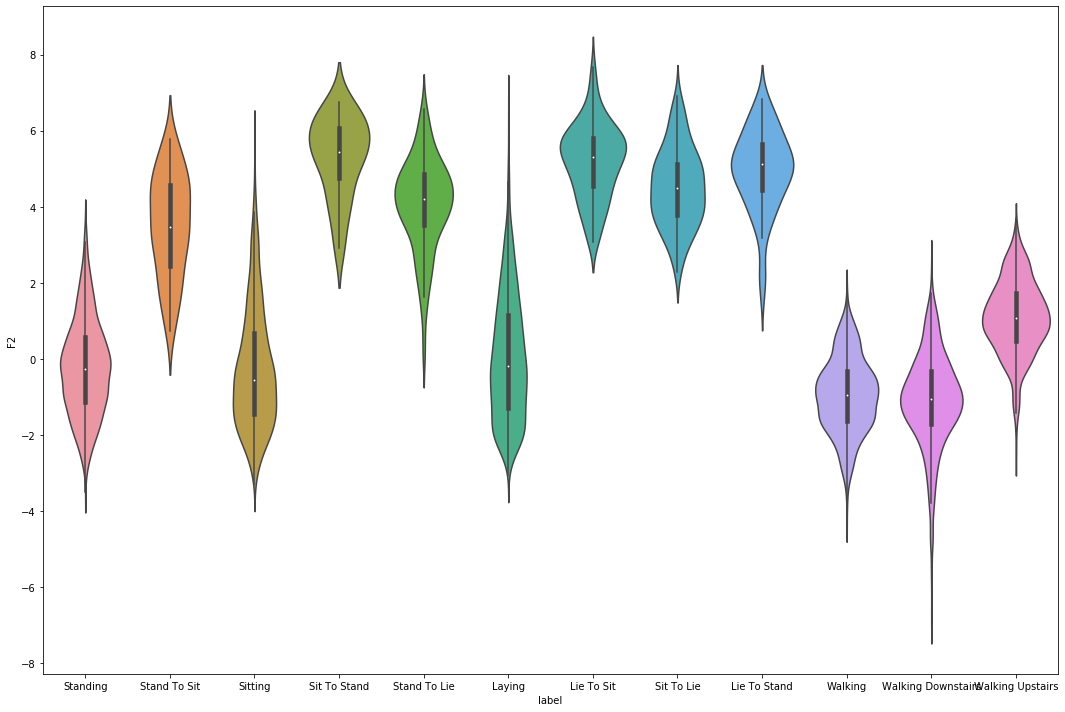

In [31]:
#Violin Plot, which is very similar to Boxplot
#Parameters are similar to boxplot
plt.figure(figsize = (15, 10))
sns.violinplot(x = 'label', y= 'F2', data = X_trans)
plt.tight_layout()

# #Models on Different Algorithms from sklearn
### 1. KNN classifier algorithm
### 2. Random forests classifier
### 3. SVM algorithm
### 4. Naive Bayes classifier
### 5. Logistic Regression
### 6. Gradient Boosting classifier
### 7. Adaboost classifier
### 8. Stochastic gradient descent
### 9. Decision tree classifier
### 10. Linear discriminant analysis
### 11. Quadratic discriminant analysis

In [32]:
#1. KNN classifier algorithm(K-Nearest Classifier Model)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.8848829854522454


In [33]:
#2. Random forests classifier
from sklearn.ensemble import RandomForestClassifier 
rr=RandomForestClassifier(150,oob_score=True,n_jobs=-1,random_state=29)
rr.fit(X_train,y_train)
y_pred2=rr.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred2))

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9104996837444655


In [34]:
#3. SVM algorithm
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train,y_train)
y_pred3 = clf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred3))

E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9367488931056294


In [35]:
#4. Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred3 = gnb.predict(X_test)
print (metrics.accuracy_score(y_test,y_pred3))

E:\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7473118279569892


In [48]:
#5. Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred4 = logreg.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred4))

E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9389626818469323


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [47]:
#6. Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred6 = gbc.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred6))

E:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8864642631246047


In [42]:
#7. Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier()
adc.fit(X_train,y_train)
y_pred7 = adc.predict(X_test)
print (metrics.accuracy_score(y_test,y_pred7))

E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5196078431372549


In [43]:
#8. Stochastic gradient descent
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X_train,y_train)
y_pred8 = clf.predict(X_test)
print (metrics.accuracy_score(y_test,y_pred8))

E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9082858950031626


In [44]:
#9. Decision tree classifier
from sklearn import tree
tc = tree.DecisionTreeClassifier()
tc.fit(X_train,y_train)
y_pred5 = tc.predict(X_test)
print (metrics.accuracy_score(y_test,y_pred5))

0.8140417457305503


In [45]:
#10. Linear discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
y_pred9 = lda.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred9))

E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9487666034155597


In [49]:
#11. Quadratic discriminant analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train,y_train)
y_pred10 = qda.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred10))

E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.8504111321948135
